# Figure S2. Goodness-of-fit measures in the PNC dataset

In [1]:
import set_env  # not included in the repo, defines $PROJECT_DIR, $PNC_PROJECT_DIR, $IMAGEN_PROJECT_DIR & $INPUT_DIR

In [2]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import pickle

OUTPUT_DIR = {
    "pnc": os.path.join(os.environ["PNC_PROJECT_DIR"], "output"),
    "imagen": os.path.join(os.environ["IMAGEN_PROJECT_DIR"], "output"),
}
INPUT_DIR = os.environ["INPUT_DIR"]
CODE_DIR = os.path.join(os.getcwd(), "..", "scripts")
sys.path.append(CODE_DIR)

from utils import transform

import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({"font.size": 16, "font.family": "Asana Math", "figure.dpi": 300})
thcolor = "#44546A"

/data/project/ei_development/env/lib/python3.10/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Load data:

In [3]:
try:
    data = pd.read_csv("pnc_data.csv", index_col=0)
except FileNotFoundError as e:
    print("Run Figure 2 first")
    raise(e)

## A. Distributions

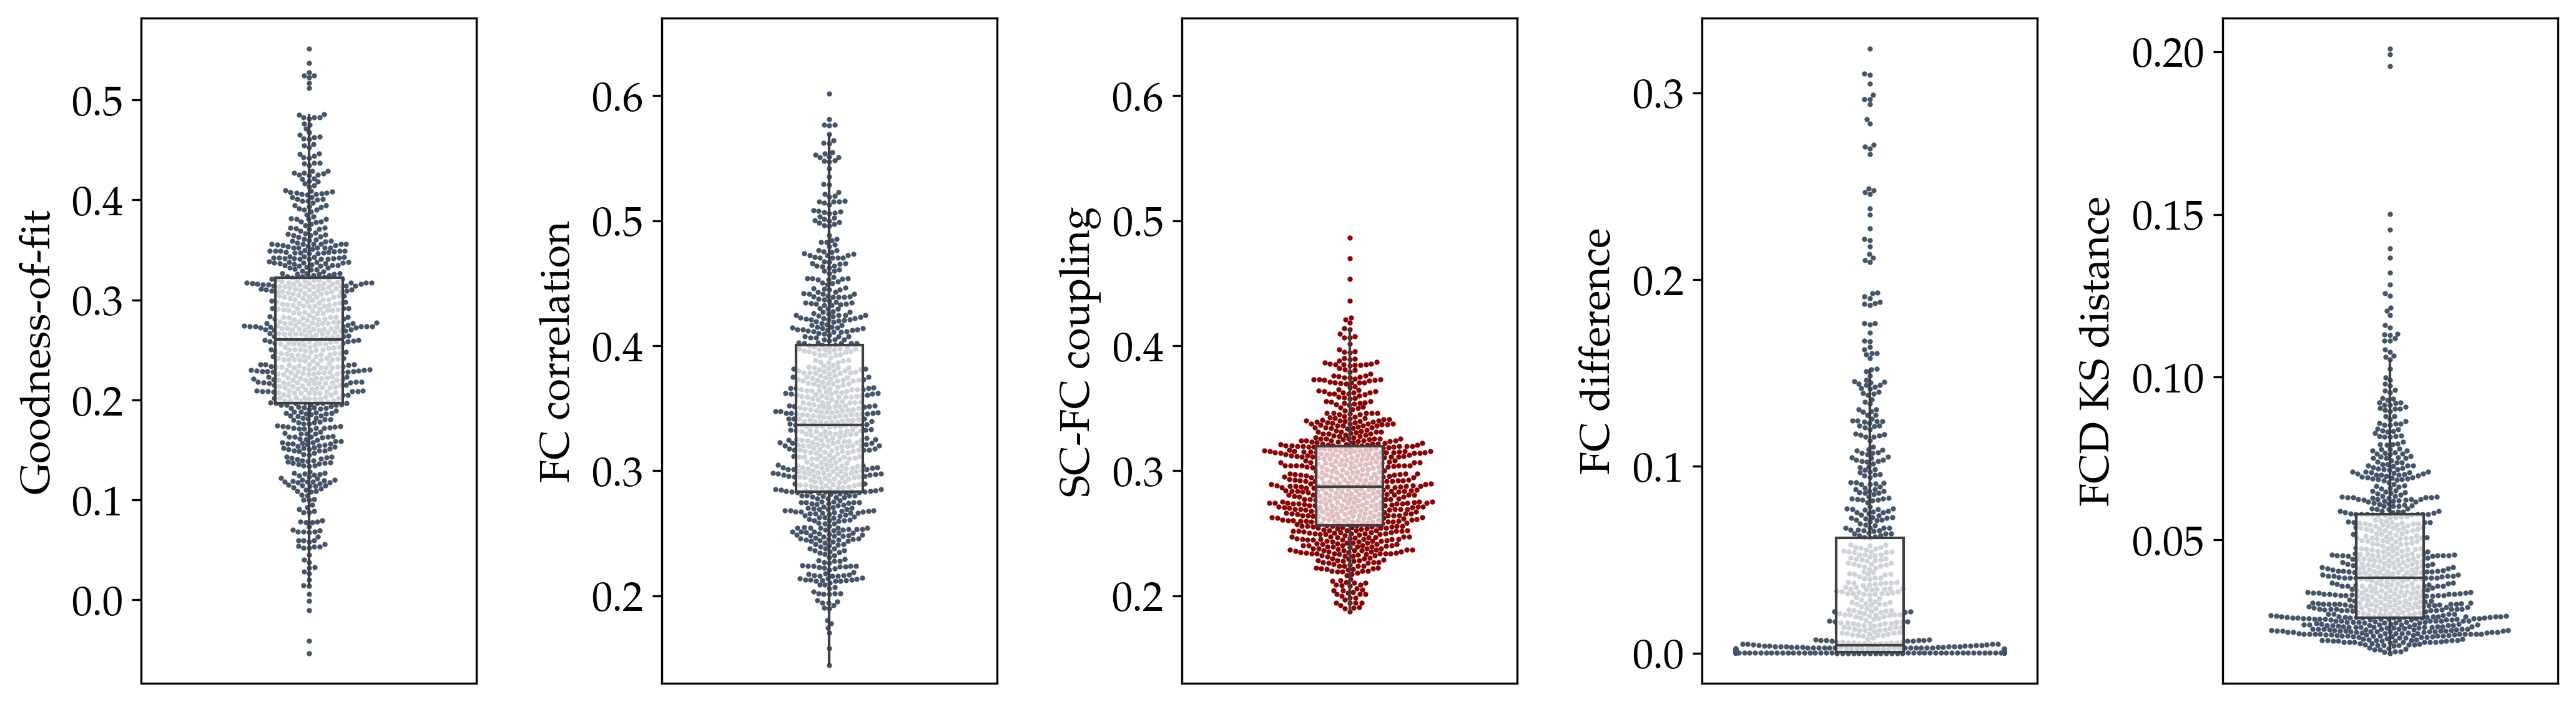

In [4]:
gof_labels = {
    "gof": "Goodness-of-fit",
    "fc_corr": "FC correlation",
    "sc_fc": "SC-FC coupling",
    "fc_diff": "FC difference",
    "fcd_ks": "FCD KS distance",
}

fig, axes = plt.subplots(1, len(gof_labels), figsize=(14, 4))
for i, (col, label) in enumerate(gof_labels.items()):
    ax = axes[i]
    if col != "sc_fc":
        color = thcolor
    else:
        color = "darkred"
    sns.swarmplot(y=data[col], s=2, color=color, ax=ax)
    sns.boxplot(
        data=data[col],
        showfliers=False,
        showcaps=False,
        width=0.2,
        boxprops={"facecolor": (1, 1, 1, 0.75)},
        ax=ax,
    )
    plt.setp(ax.collections, zorder=0, label="")  # puts swarm in the back
    ax.set_ylabel(label)
    ax.set_xticks([])
    if col in ["sc_fc", "fc_corr"]:
        ax.set_ylim(
            [
                data[["sc_fc", "fc_corr"]].values.min() * 0.9,
                data[["sc_fc", "fc_corr"]].values.max() * 1.1,
            ]
        )
fig.tight_layout(pad=1.0)

In [5]:
data[list(gof_labels.keys())].describe().round(3)

,gof,fc_corr,sc_fc,fc_diff,fcd_ks
count,752.000,752.000,752.000,752.000,752.000
mean,0.259,0.344,0.291,0.040,0.045
std,0.101,0.085,0.048,0.063,0.026
min,-0.053,0.144,0.188,0.000,0.015
25%,0.197,0.283,0.256,0.001,0.026
50%,0.260,0.337,0.287,0.004,0.038
75%,0.322,0.400,0.320,0.062,0.058
max,0.551,0.602,0.486,0.324,0.201


## B. Age variation

Goodness-of-fit	0.062	0.09
FC correlation	-0.073	0.044
SC-FC coupling	-0.129	0.0
FC difference	-0.182	0.0
FCD KS distance	-0.039	0.287


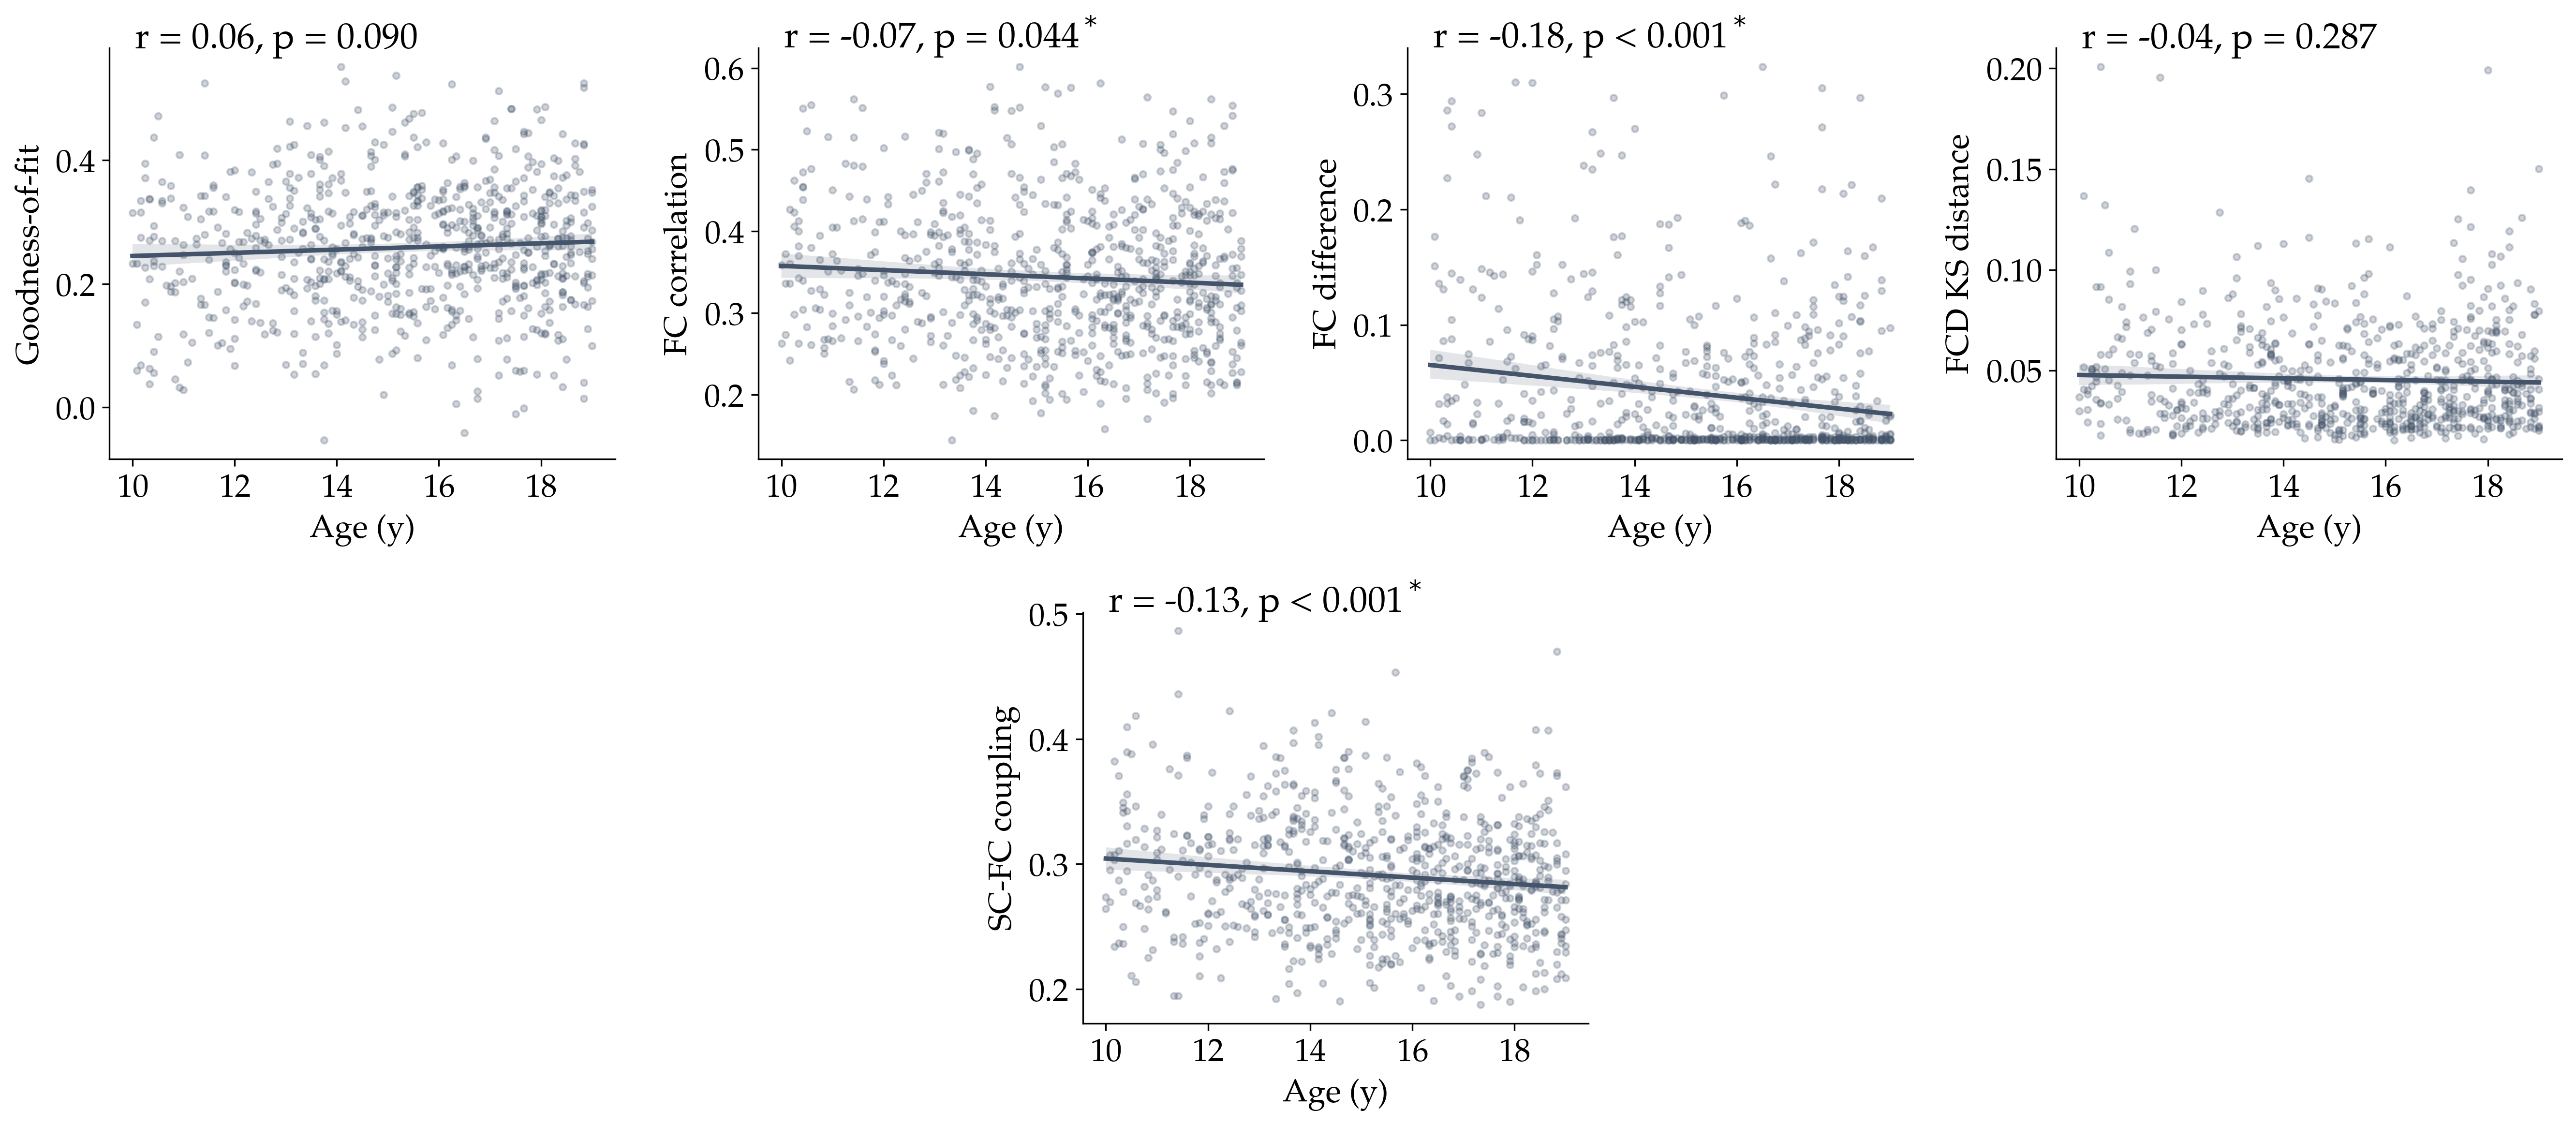

In [6]:
fig, axd = plt.subplot_mosaic(
    [
        ["gof"] * 2 + ["fc_corr"] * 2 + ["fc_diff"] * 2 + ["fcd_ks"] * 2,
        ["emp_left"] * 3 + ["sc_fc"] * 2 + ["emp_right"] * 3,
    ],
    gridspec_kw=dict(width_ratios=[1] * 8, height_ratios=[1] * 2),
    figsize=(18, 8),
)
axd["emp_left"].axis("off")
axd["emp_right"].axis("off")
add_text = True
for col, label in gof_labels.items():
    # plot
    ax = axd[col]
    sns.regplot(
        x=data["Age (y)"],
        y=data[col],
        scatter_kws=dict(color=thcolor, alpha=0.25, s=10),
        line_kws=dict(color=thcolor),
        ax=ax,
    )
    sns.despine()
    # stats
    r, p = scipy.stats.pearsonr(data["Age (y)"], data[col])
    if add_text:
        if p > 0.001:
            text = f"r = {r:.2f}, p = {p:.3f}"
        else:
            text = f"r = {r:.2f}, p < 0.001"
        if p < 0.05:
            text += r"$^*$"
        text_x = ax.get_xlim()[0] + (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.05
        text_y = ax.get_ylim()[0] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 1
        ax.text(text_x, text_y, text, color="black", size=18, multialignment="left")
    ax.set_ylabel(label)
    print(label, round(r, 3), round(p, 3), sep="\t")
fig.tight_layout(pad=1.0)